In [2]:
#@title **Importar Bibliotecas** { vertical-output: true, form-width: "60%" }

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
# Lendo a amostra
df = pd.read_csv('Mortalidade_2021_Amostra.csv', sep=';')

# Definindo os tipos de variável
df['SEXO'] = df['SEXO'].astype('category')
df['DTOBITO'] = pd.to_datetime(df['DTOBITO'], format='%d%m%Y', errors='coerce')
df['HORAOBITO'] = df['HORAOBITO'].round().astype('Int64')
df['TPMORTEOCO'] = df['TPMORTEOCO'].astype('category')
df['SEMAGESTAC'] = df['SEMAGESTAC'].astype('Int64')
df['PESO'] = df['PESO'].astype('Int64')

df['HORAOBITO'] = df['HORAOBITO'].astype('str') # Transformando em string
df['HORAOBITO'] = df['HORAOBITO'].str.zfill(4) # Colocando um padding para garantir que todos os valores tenham 4 algarismos
df['HORAOBITO'] = pd.to_datetime(df['HORAOBITO'], format='%H%M', errors='coerce').dt.time # Transformando para tipo data HH:MM

df['IDADEMAE'] = df['IDADEMAE'].astype('Int64')


# Apagando colunas inúteis
df = df.drop('ORIGEM', axis=1)
df = df.drop('VERSAOSIST', axis=1)
# display(df)

# df.info()


/tmp/ipython-input-12-4112134190.py:2: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Mortalidade_2021_Amostra.csv', sep=';')


       TIPOBITO    DTOBITO HORAOBITO  NATURAL  CODMUNNATU      DTNASC  IDADE  \
8             2 2021-01-30  10:30:00    841.0    410480.0   1121975.0    445   
10            2 2021-04-23  18:00:00    843.0    431870.0   8101979.0    441   
72            2 2021-06-10  14:08:00    823.0    231410.0  10082000.0    420   
77            2 2021-12-19       NaT    824.0    241220.0  18111994.0    427   
92            2 2021-09-11  16:39:00    829.0    291600.0   8021969.0    452   
...         ...        ...       ...      ...         ...         ...    ...   
49952         2 2021-03-26  13:14:00    831.0    312810.0   7121924.0    496   
49973         2 2021-09-17  10:57:00    816.0    160030.0  16111991.0    429   
49981         2 2021-08-31  18:30:00    829.0    292780.0  19091955.0    465   
49985         2 2021-08-11       NaT    833.0    330455.0  13061963.0    458   
49998         2 2021-06-04  19:30:00    826.0    260620.0  27012005.0    416   

      SEXO  RACACOR  ESTCIV  ...  FONTE

# Perguntas
- O que se pode concluir com o número de semanas de gravidez?
- Em quais faixas de peso ocorreram mais óbitos?
- Como é a distribuição dos horários de óbito?
- Quais estados civis possuem maior taxa de suicídio?
- Qual a taxa de realização de autópsias de confirmação para óbitos decorridos de acidentes?

### Qual a taxa de realização de autópsias de confirmação para óbitos decorridos de homicidios e acidentes?

A taxa de óbitos confirmados por necrópsia causados por acidentes é relativamente baixa (aprox. 39%) o que não é um valor agradável. Obviamente, é preciso analisar cada caso isoladamente podendo tornar uma necropsia desnecessária. Mas a taxa alta de inconfirmados pode indicar uma margem para casos de mortes causadas por outros fatores sendo rotuladas como acidentes.

Já por outro lado, nos casos de homicídio cerca de 25% dos casos não foram confirmados por óbitos  

75.57251908396947
24.427480916030532


Text(1, 26.427480916030532, '24.43%')

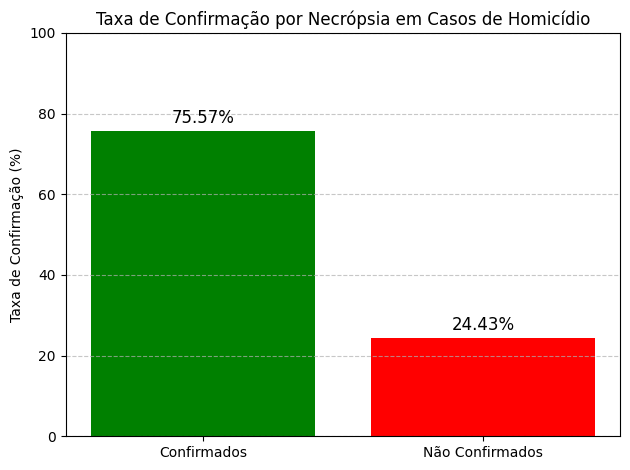

In [4]:
import matplotlib.pyplot as plt

# Total de óbitos por homicídio
obitos_acidentes = df[df['CIRCOBITO'] == 3]
# Total confirmados por necrópsia
acidentes_confirmados = obitos_acidentes[obitos_acidentes['NECROPSIA'] == 1]

# Calcular taxas gerais
taxa_confirmacao = (len(acidentes_confirmados) / len(obitos_acidentes)) * 100
taxa_inconfirmados = 100 - taxa_confirmacao
print(taxa_confirmacao)
print(taxa_inconfirmados)

# Construir uma barra para cada taxa
plt.bar(['Confirmados', 'Não Confirmados'], [taxa_confirmacao, taxa_inconfirmados], color=['green', 'red'])

# Customizar gráfico
plt.ylabel("Taxa de Confirmação (%)")
plt.title("Taxa de Confirmação por Necrópsia em Casos de Homicídio")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir valor no topo da barra
plt.text(0, taxa_confirmacao + 2, f"{taxa_confirmacao:.2f}%", ha='center', fontsize=12)
plt.text(1, taxa_inconfirmados + 2, f"{taxa_inconfirmados:.2f}%", ha='center', fontsize=12)

61.00056850483229
38.99943149516771


Text(1, 40.99943149516771, '39.00%')

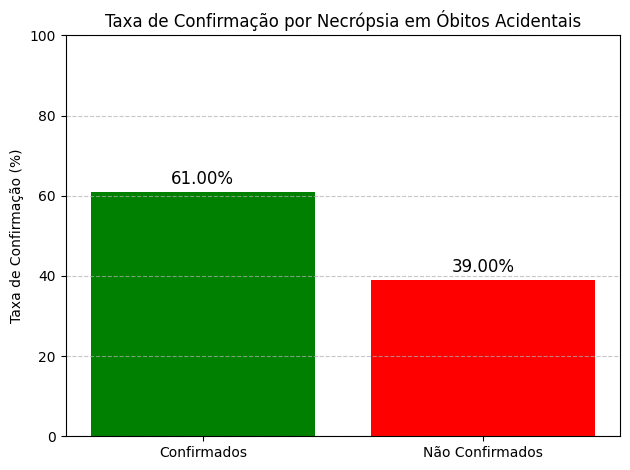

In [5]:
# Total de óbitos acidentais
obitos_acidentes = df[df['CIRCOBITO'] == 1]
# Total confirmados por necrópsia
acidentes_confirmados = obitos_acidentes[obitos_acidentes['NECROPSIA'] == 1]

# Calcular taxas gerais
taxa_confirmacao = (len(acidentes_confirmados) / len(obitos_acidentes)) * 100
taxa_inconfirmados = 100 - taxa_confirmacao
print(taxa_confirmacao)
print(taxa_inconfirmados)

# Construir uma barra para cada taxa
plt.bar(['Confirmados', 'Não Confirmados'], [taxa_confirmacao, taxa_inconfirmados], color=['green', 'red'])

# Customizar gráfico
plt.ylabel("Taxa de Confirmação (%)")
plt.title("Taxa de Confirmação por Necrópsia em Óbitos Acidentais")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir valor no topo da barra
plt.text(0, taxa_confirmacao + 2, f"{taxa_confirmacao:.2f}%", ha='center', fontsize=12)
plt.text(1, taxa_inconfirmados + 2, f"{taxa_inconfirmados:.2f}%", ha='center', fontsize=12)


### Quais estados civis possuem maior taxa de suicídio?

O Estado civil com maior taxa de suicido é o "Solteiro". Isso provavelmente acontece por ser o maior grupo. Assim, crianças, adolescente e jovens ainda não casados estão todos englobados nesse grupo, além de que o namoros não são documentados oficialmente, então essa análise ignora esse fator.
Por outro lado, os estados "Separado" e "União estável" são os que possuem maior taxa de suicídio após "Solteiro".

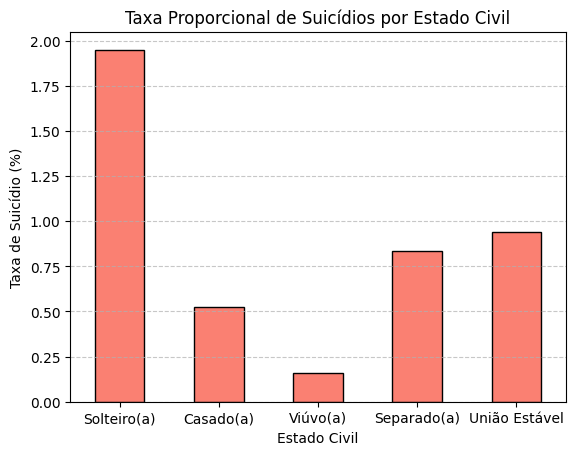

In [6]:
# Filtrar apenas estados civis válidos
df_valid_estciv = df[df['ESTCIV'].between(1, 5)]

# Total de pessoas por estado civil
total_por_estciv = df_valid_estciv['ESTCIV'].value_counts().sort_index()

# Total de suicídios por estado civil
suicidios_por_estciv = df_valid_estciv[df_valid_estciv['CIRCOBITO'] == 2]['ESTCIV'].value_counts().sort_index()

# Calcular a taxa proporcional de suicídio (%)
taxa_suicidio = (suicidios_por_estciv / total_por_estciv) * 100

# Nomes dos estados civis
labels = {
    1: 'Solteiro(a)',
    2: 'Casado(a)',
    3: 'Viúvo(a)',
    4: 'Separado(a)',
    5: 'União Estável'
}

# Mapear nomes para números (1 ao 5)
taxa_suicidio.index = taxa_suicidio.index.map(labels)

# Plotar gráfico
taxa_suicidio.plot.bar(color='salmon', edgecolor='black')
plt.ylabel("Taxa de Suicídio (%)")
plt.xlabel("Estado Civil")
plt.title("Taxa Proporcional de Suicídios por Estado Civil")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

### O que se pode concluir com o número de semanas de gravidez?
Pelas análises, pode-se concluir que a maioria dos óbitos ocorrem na segunda metade da gravidez, ou seja, 20 semanas ou mais. Isso faz sentido, considerando que na gravidez as complicações maiores geralmente surgem quando o embrião já se desenvolveu o suficiente ou já no final da gravidez, na hora do parto.
Olhando para os gráficos, percebemos uma crescente por volta das 35-40 semanas e a média de aproximadamente 31, que seria exatamente o final da gravidez (8 a 9 meses aproximadamente).

Outro fator interessante é o pico de óbitos no início da gravidez. Esse pico provavelmente indica a rejeição da gravidez por outros tipos de problemas, como alterações cromossômicas do embrião ou rejeição imunológica, quando o corpo da mãe reconhece o embrião como um corpo estranho. Assim o aborto acontece já nas primeiras semanas de gestação, levando muitas mães a óbito.

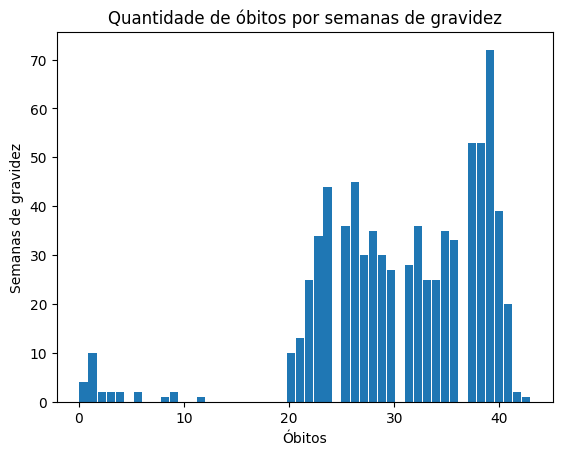

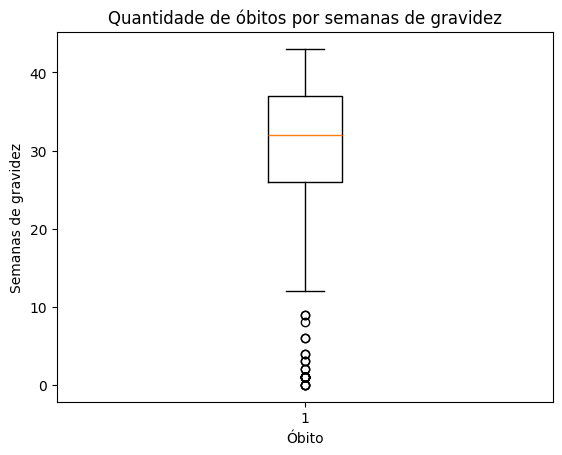

,SEMAGESTAC
count,777.0
mean,30.72973
std,7.965554
min,0.0
25%,26.0
50%,32.0
75%,37.0
max,43.0


In [7]:
# Separando os registros menores que 50, já que o tempo médio de gravidez é de 40 semanas. Gravidez com períodos maiores do que isso são extremamente raras.
df[(df['SEMAGESTAC'] < 50)]['SEMAGESTAC'].plot.hist(bins=50, rwidth=0.9)
plt.ylabel("Semanas de gravidez")
plt.xlabel("Óbitos")
plt.title("Quantidade de óbitos por semanas de gravidez")
plt.show()

plt.boxplot(df[(df['SEMAGESTAC'] < 50)]['SEMAGESTAC'])
plt.ylabel("Semanas de gravidez")
plt.xlabel("Óbito")
plt.title("Quantidade de óbitos por semanas de gravidez")
plt.show()

df[(df['SEMAGESTAC'] < 50)]['SEMAGESTAC'].describe() # Informações de média, desvio padrão, máximo, mínimo e mais

### Em quais faixas de peso ocorreram mais óbitos?
Olhando os gráficos, percebe-se um pico no intervalo de 300 a 1000 gramas ao nascer. Isso demonstra que os partos precoces aumentam significativamente as chances de óbito.

Em pesquisas feitas no site [Babysec](https://www.babysec.com.br/nota/peso-nos-recem-nascidos), viu-se que a média de peso ao nascer é de 3.400 gramas. Isto explica que a existência de um pico menos protuberante na faixa de 3000 gramas se deu pelo fator "normalidade".

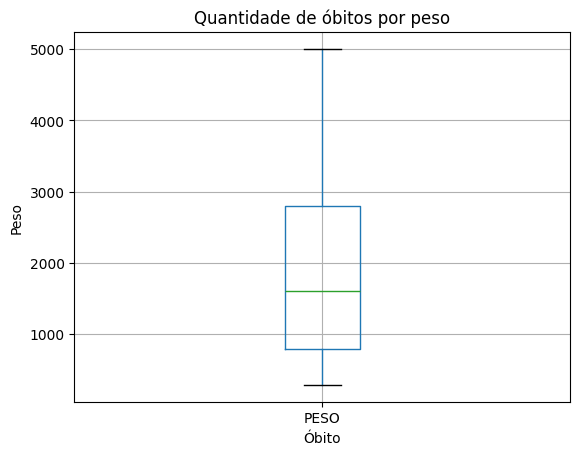

In [8]:
df['PESO']
df.boxplot(column=['PESO'])
plt.ylabel("Peso")
plt.xlabel("Óbito")
plt.title("Quantidade de óbitos por peso")
plt.show()

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400,
       5500])

/tmp/ipython-input-9-922083423.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_por_peso = df.groupby(bins).size()


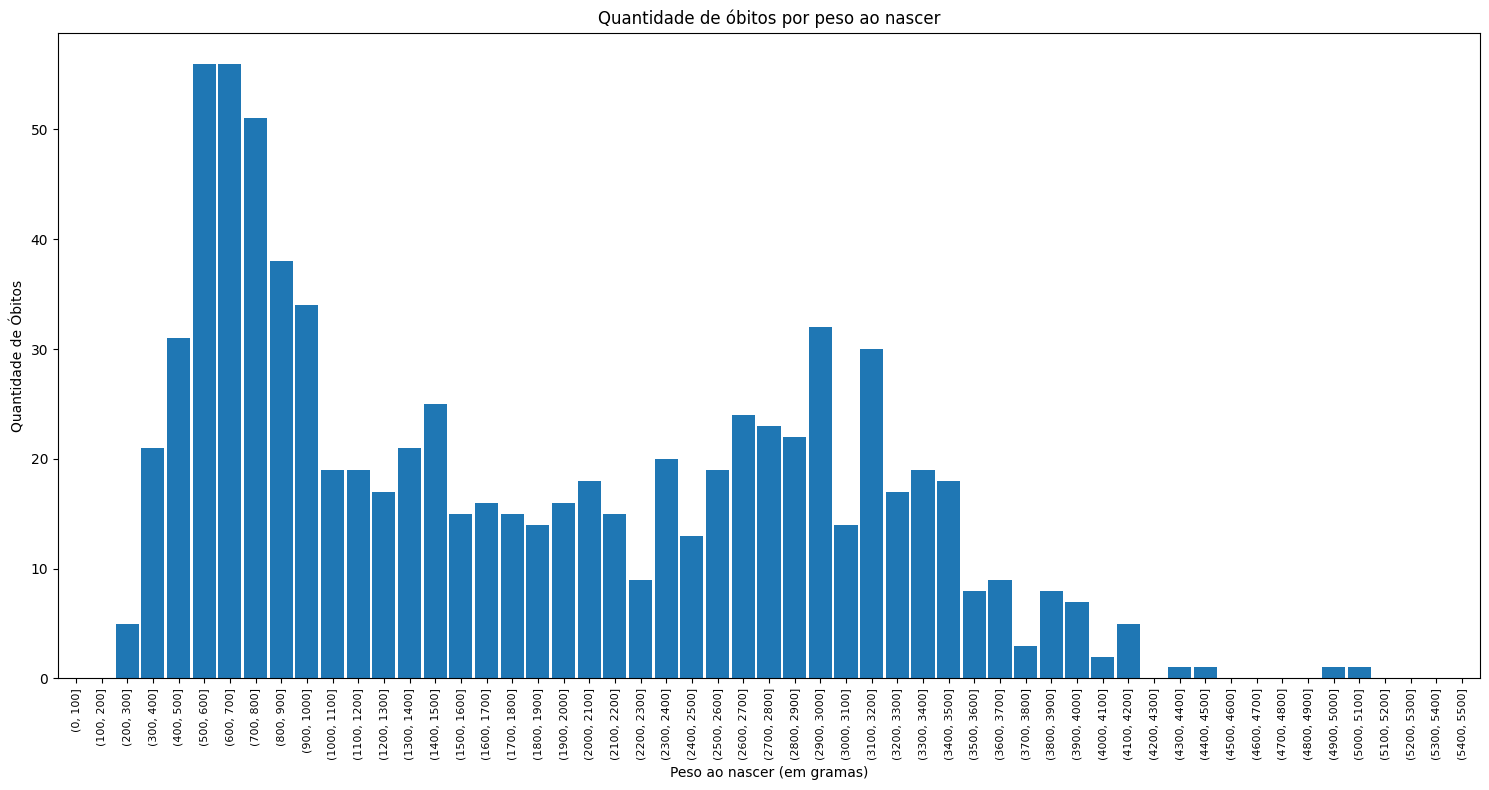

In [9]:
# Criando faixas de peso de 100 em 100
faixas_peso = np.arange(0, 5501, 100)
display(faixas_peso)
# Categorizando os registros nas faixas
bins = pd.cut(df['PESO'], faixas_peso)

# Agrupar pelas faixas e contar as ocorrências
contagem_por_peso = df.groupby(bins).size()

# Plotar o resultado da contagem
plt.figure(figsize=(15, 8))
contagem_por_peso.plot(kind='bar', width=0.9)

plt.xlabel("Peso ao nascer (em gramas)")
plt.ylabel("Quantidade de Óbitos")
plt.title("Quantidade de óbitos por peso ao nascer")

plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### Como é a distribuição dos horários de óbito?

/tmp/ipython-input-10-1024467381.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['HORAOBITO'].astype(str)).dt.hour # Extraindo as horas


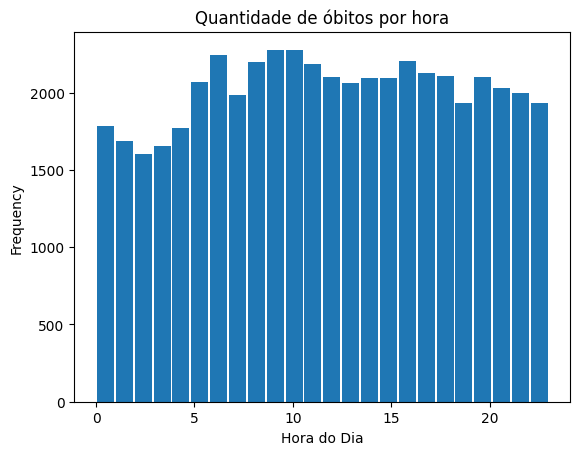

In [10]:
df['hora'] = pd.to_datetime(df['HORAOBITO'].astype(str)).dt.hour # Extraindo as horas

df['hora'].plot.hist(bins=24, rwidth=0.9)
plt.xlabel("Hora do Dia")
plt.title("Quantidade de óbitos por hora")
plt.show()